## import local

if no test dataset:
    train,test    =split
 = Balance(train)

clf = RandomForestClassifier(n_estimators=50, n_jobs=-1)

bagging n boost = True

sklearn.calibration.
clf_cal = CalibratedClassifierCV(cv_clf,cv=prefit, cv = k)   resulting in k**2

2 modes for kaggle
1. train,train-valid, train-test using split-train_test
    ratio = .2 verify model against train dataset
2. train,train-valid, test using split-train_test 
   create model from bigger trainset, using ratio = 0.2.0,1 etce
use clf_cal. predict on test


In [1]:
!conda list

# packages in environment at /Users/brucecottman/anaconda3/envs/paso:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  
absl-py                   0.7.0                    pypi_0    pypi
alabaster                 0.7.12                   py37_0  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.6                    py37_0  
anaconda-project          0.8.2                    py37_0  
ansimarkup                1.4.0                    pypi_0    pypi
appnope                   0.1.0                    py37_0  
appscript                 1.0.1            py37h1de35cc_1  
asn1crypto                0.24.0                   py37_0  
astor                     0.7.1                    pypi_0    pypi
astroid                   2.1.0                    py37_0  
astropy                   3.1              py37h1de35cc_0  
atomicwrites              1.2.1                    py37_0  
att

In [2]:
from __future__ import print_function
__file__ = !cd .. ;pwd
__file__ = __file__[0]
__file__

'/Users/brucecottman/Documents/PROJECTS/paso'

In [3]:
import sys
from random import random
import pandas as pd
from tqdm import tqdm

sys.path.append(__file__)
sys.path

['/Users/brucecottman/Documents/PROJECTS/paso/lessons',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python37.zip',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/lib-dynload',
 '',
 '/Users/brucecottman/.local/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/aeosa',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/IPython/extensions',
 '/Users/brucecottman/.ipython',
 '/Users/brucecottman/Documents/PROJECTS/paso']

In [4]:
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary

import warnings
warnings.filterwarnings("ignore")
import multiprocessing

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
import seaborn as sns
color = sns.color_palette()
sns.set(rc={'figure.figsize':(6,4)})
from paso.base import Paso,Log,PasoError
from loguru import logger
session = Paso(parameters_filepath='../parameters/lesson.3.yaml').startup()

paso 6.8.2019 16:04:14 INFO Log started
paso 6.8.2019 16:04:14 INFO ========================================
paso 6.8.2019 16:04:14 INFO Read in parameter file: ../parameters/lesson.3.yaml


In [5]:
from paso.base import Paso,Log,PasoError,Param,NameToClass
from loguru import logger
session = Paso(parameters_filepath='../parameters/lesson.3.yaml').startup()

paso 6.8.2019 16:04:15 INFO ========================================
paso 6.8.2019 16:04:15 INFO Read in parameter file: ../parameters/lesson.3.yaml


## Balancing and  Augmentating Class Stratified Data

Structured Data Augmentation is very rarely discussed in theoretical or real-world production systems. It a secret sauce for which the recipe will be shown here. Along the way, we will introduce ``paso's`` Class Balancing tools. As was shown in the previous two articles, **paso** supports and is compatiable with ``sklearn``.



## A Quick Overview of paso

**paso** is a package written in Python and some ``C``(for speed) that was originally intended to bundle best-practices and state-of-the-art services, classes and functions for the Machine Learning and Deep Learning community. **paso** has grown beyond this to offer patterns, classes and methods you can use in your **Scikit-Learn pipelines** or custom code with or without adopting the entire **paso** package.

**Scikit-Learn pipelines** are composed of steps, each step has to be **Scikit-Learn transformer** or a custom **Scikit-Learn transformer**. The last of the pipeline can be a transformer or an estimator, where a **Scikit-Learn estimator** is a compatible model. 

**paso** has quite a few Class Balancing transformers that are custom **Scikit-Learn transformers**. Note that **paso** translates from Spanish to English to the word step.

Discussion will be divided into the following major segments:
- Loading a Toy Dataset with **paso** ``Inputer``.
- What Class Balancing stratagems are in **paso**.
- How to use Class Balancing to argument Fixed Structure data
- The benefits of argumenting Fixed Structure data.
- As usual the source code for all examples is available.

As we saw in [lesson-1](), we need to startup **paso** services.

In [ ]:
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary

import warnings
warnings.filterwarnings("ignore")
import multiprocessing

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
import seaborn as sns
color = sns.color_palette()

from paso.base import Paso,Log,PasoError
from loguru import logger
session = Paso(parameters_filepath='../parameters/lesson.3.yaml').startup()

paso 6.8.2019 16:04:16 INFO ========================================
paso 6.8.2019 16:04:16 INFO Read in parameter file: ../parameters/lesson.3.yaml


## Toy Example Dataset

The **paso** class is a general method to read in datasets and return them as dataframes. For now, we can use them. In a future lesson we will cover  ``Inputer`` in  detail.  All available ``Inputer`` methods are shown with:

In [ ]:
from paso.pre.inputers import Inputer,Splitter
inputer = Inputer(ontological_filepath='../ontologies/pre/inputers/iris.yaml')
inputer.inputers()

['exec', 'cvs', 'xls', 'xlsm', 'text', 'image2D', 'image3D']

In [ ]:
inputer.datasets()

paso 6.8.2019 16:04:17 INFO Loaded Ontological file:../ontologies/pre/inputers/iris.yaml 


['train']

Let us start with a toy dataset to class balance. we load the ``iris``data set, into the ``flower`` dataframe.  The feature ``TypeOf`` will contain the class target values.

In [ ]:
flower = inputer.transform()
inputer.target

paso 6.8.2019 16:04:17 INFO Loaded Ontological file:../ontologies/pre/inputers/iris.yaml 


'TypeOf'

### A short aside on ontological files.

Instead of using keyword arguments cemented in code, I will use an ontological file. One working definition of ontological (from Wikipedia) is:

    "showing the relations between the concepts and categories in a subject area or domain".

We are using ontological files because:
- the description of an object (dataset, model,etc.) can be changed without changing code
- the parsing performance of an ontological file and python are about the same as both use dynamic typing. This probably would not be case for statically typed language. However, an object's metadata parsing compute is very tiny compared to the action(s) performed on or by the object in all cases encountered so far.  

We will found out if ontological files have a measurable overhead as we port **paso** to other frameworks (such as **RAPIDS**) or statically-typed languages (such as ``swift``). At much of python's workhorse packages are in fast, statically-typed ``C``, so I doubt it.

Ontological files consist of hierarchy of key-value pairs.  In a future lesson we will cover Ontological files in  detail. [Different Ontological files can be viewed here.](https://github.com/bcottman/paso/tree/master/ontologies)


In [ ]:
DataFrameSummary(flower).summary()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),TypeOf
count,150,150,150,150,150
mean,5.84333,3.05733,3.758,1.19933,1
std,0.828066,0.435866,1.7653,0.762238,0.819232
min,4.3,2,1,0.1,0
25%,5.1,2.8,1.6,0.3,0
50%,5.8,3,4.35,1.3,1
75%,6.4,3.3,5.1,1.8,2
max,7.9,4.4,6.9,2.5,2
counts,150,150,150,150,150
uniques,35,23,43,22,3


## It is important to split first before balancing

Before training the learner it is very important to balance only the dataset we will train on. We want to know the effect of balancing data on the learner, while not corrupting our validation  dataset with augmented  data that balances the classes.

Validation is drawn from the initial train dataset in the hopes it is a sample of the past and future data that the test dataset will be drawn from. The other case where train, valid, test are sampled from the original dataset is covered by splitting the initial dataset to result in train and valid. Then split on train again to get train and test. The order does not matter so long as the second split is also on the train dataset .

In [ ]:
splitter = Splitter(ontological_filepath='../ontologies/pre/inputers/split-stratify-shuffle-30.yaml')
train,test=splitter.transform(flower,target=inputer.target,random_state=11)
train.head()

paso 6.8.2019 16:04:19 INFO Loaded Ontological file:../ontologies/pre/inputers/split-stratify-shuffle-30.yaml 


,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),TypeOf
122,6.7,2.0,7.7,2.8,2
106,4.5,1.7,4.9,2.5,2
35,1.2,0.2,5.0,3.2,0
40,1.3,0.3,5.0,3.5,0
25,1.6,0.2,5.0,3.0,0


The argument ratio is the amount of the dataset to assign to the validation (test) dataset. In this case,
``X``and ``y`` datasets into training set(50\%) and test set(50\%). 

Note: A ``valid`` dataset is not made as we are not tuning learner parameters in this lesson. 

## paso Class for Handling Imbalanced Classes

All available class balance strategies are shown with:

In [ ]:
from paso.pre.cleaners import Class_Balance
class_balancer = Class_Balance(ontological_filepath='../ontologies/cleaners/SMOTE.yaml')
class_balancer.classBalancers()

['RanZOverSample',
 'SMOTE',
 'ADASYN',
 'BorderLineSMOTE',
 'SVMSMOTE',
 'SMOTENC',
 'RandomUnderSample',
 'ClusterCentroids',
 'NearMiss',
 'EditedNearestNeighbour',
 'RepeatedEditedNearestNeighbours',
 'CondensedNearestNeighbour',
 'OneSidedSelection']

I am going to oversample the minority classes by using ``SMOOT``. I reccomend [Handling imbalanced datasets in machine learning](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28) for more detail on how to balance class imbalanced datasets.

In [ ]:
targetFeature = inputer.target
class_balancer = Class_Balance(ontological_filepath='../ontologies/pre/cleaners/SMOTE.yaml')
train = class_balancer.transform(train,targetFeature)

paso 6.8.2019 16:04:20 INFO Loaded Ontological file:../ontologies/pre/cleaners/SMOTE.yaml 
paso 6.8.2019 16:04:20 INFO Class_Balance:: SMOTE
paso 6.8.2019 16:04:20 INFO Class_Balance: SMOTE with kwargs {}


In [ ]:
DataFrameSummary(train).summary()

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),TypeOf
count,123,123,123,123,123
mean,3.74567,1.20057,5.8294,3.06843,1
std,1.72814,0.764709,0.766345,0.432549,0.819836
min,1.1,0.1,4.3,2.2,0
25%,1.6,0.3,5.2,2.8,0
50%,4.4,1.3,5.8,3,1
75%,5.1,1.8,6.3,3.35,2
max,6.7,2.5,7.7,4.2,2
counts,123,123,123,123,123
uniques,44,32,42,32,3


``Class_Balance`` did not change the ``Flower-train`` dataframe as the ``iris``dataset comes class balanced. 

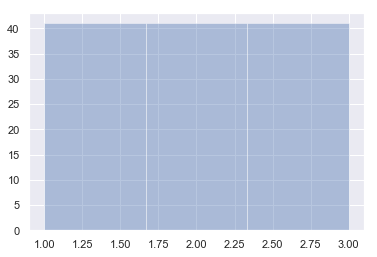

In [ ]:
sns.set(rc={'figure.figsize':(6,4)})
sns.distplot((train[inputer.target].astype('category').cat.codes.astype('int')+1),kde=False)

## A short aside on cross-validation and classification train/predict model

In an future lesson, I will cover in detail how to use **paso**'s cross-validation for learners that can train and then predict. In the meantime, you can find a good [overview of cross-validation](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and a [detailed discussion of cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics).

In this lesson, we use **repeated random sub-sampling** or ``sklearn.ensemble.BaggingClassifier``. This is hopefully a good choice for the class stratified datasets we will be using.

Similar to **K-Fold cross-validation** , we set a value for ``n_estimators`` which signifies the number of times we will train our learner on a random subset of the train dataset. However, in this case ``n_estimator``  will not represent the number of learners.
Instead, on each training iteration, we randomly select data points for the train folds. The number of data points we select will be a certain percentage we set for the initial trainng set. For example, if we select ``max_samples= 0.90``, then each iteration we will apply the learner to randomly selected 90% of the data points of our original train dataset.  This is similar to ``K-fold`` with ``K=10``, except the samples in folds are chosen at random and it will be more computational expensive if  ``n_estimator >> K``.

 You should note that ``BaggingClassifier`` will need keep ``n_estimators`` dataset+tree around. If you have a large dataset, it maybe required to pare the dataset down by removing the weakest predictive features in the initial cleaning. I should have done this with the **otto-group**, but I did not. 

## Using the RandomForest learner

In [ ]:
from paso.learners.learners import Learner
learner = Learner(ontological_filepath='../ontologies/learners/RandomForestClassification.yaml',target='TypeOf')
learner.train(train,target=inputer.target
              ,checkpoint='irisRandomForest1.ckp')

paso 6.8.2019 16:04:23 INFO Loaded Ontological file:../ontologies/learners/RandomForestClassification.yaml 
paso 6.8.2019 16:04:23 INFO learner: RandomForest with kwargs {'n_estimators': 200, 'n_jobs': -1, 'criterion': 'gini'}
paso 6.8.2019 16:04:23 INFO cross_validation: BaggingClassifier
paso 6.8.2019 16:04:23 INFO     cv kwargs: {'n_estimators': 100, 'bootstrap_features': True, 'max_samples': 0.9, 'max_features': 1.0, 'n_jobs': -1}
paso 6.8.2019 16:17:47 INFO cross_validation: CalibratedClassifierCV
paso 6.8.2019 16:17:47 INFO     cv kwargs: {'method': 'isotonic', 'cv': 10}


Because the population of each of the Iris classes is about the same, the accuracy and the F1-score are almost equal.

In [ ]:
learner.predict(test,measure=True)
learner.metrics

In [ ]:
learner.wrong_predicted_class

Overall, very good scores using ``RandomForestClassifier`` on 70% of dataset train and 30% for of dataset for validation.

Interesting there were correct class assignments but logloss got slightly worse when we balanced the classes using ``SMOTE``.

Using splitter, we can shuffle rows around and get different ``flower`` train and test datasets.

## Augment the ``iris``dataset.

Now we can augment (increase by 10\% the amount data) with  synthetic data generated by a claas imbalence scheme,  ``SMOOT``. Just ``TypeOf=0`` needs 15(10%) rows (3 classes of 5 rows) of synthetic data to balance the classes. The result is similar to image augmention in that we accomplished structured data augmentation by increasing the row count ``Isis``dataset with synthetic data.

In [ ]:
from paso.pre.cleaners import Augment_by_Class

In [ ]:
from paso.pre.cleaners import Augment_by_Class
augmenter = Augment_by_Class(ontological_filepath='../ontologies/pre/cleaners/SMOTE.yaml')
ratio = 0.5
targetFeature =  inputer.target
augment =augmenter.transform(train,targetFeature,ratio)
DataFrameSummary(augment).summary()

Notice the ``mean``, ``std`` and other statistics have slightly changed. Also, the count has inreased by 10% or augmented a structured dataset by 10%. Why do expect slight and not large change in the dataset statistics?

In [ ]:
learner.train(augment,target=inputer.target)
learner.predict(test,measure=True)
learner.metrics

Hmmm, seemed to improve scores a little bit. Let us try 100% augmentation or double the number of rows in the  ``Flower`` dataframe.

In [ ]:
learner.wrong_predicted_class

## Augmentation ``flower`` train and test datasets

In [ ]:
def grinder(N,M,S,input_file):
    score = np.zeros((S,N,M+2), dtype=np.float32)
    scores = {}
    score_names = {0:'logloss'
                  ,1:'f1'}
    ratio = 1.0

    for i in tqdm(range(N)):
        inputer = Inputer(ontological_filepath=input_file)
        flower = inputer.transform(verbose=False)
        splitter = Splitter(ontological_filepath='../ontologies/pre/inputers/split-stratify-shuffle-30.yaml')
        train,test=splitter.transform(flower,verbose=False
                                      ,target=inputer.target
                                      ,random_state=22*(i+1))
        # do not balancee       
        learner = Learner(ontological_filepath='../ontologies/learners/RandomForestClassification.yaml',target='TypeOf')
        learner.train(train,target=inputer.target,verbose=False
                      ,checkpoint='irisRandomForest2.ckp')  
        learner.predict(test,measure=True)
        score[0,i,0] = learner.metrics[score_names[0]]
        score[1,i,0] = learner.metrics[score_names[1]]
        #Class_Balance
        class_balancer = Class_Balance(ontological_filepath='../ontologies/pre/cleaners/SMOTE.yaml')
        train = class_balancer.transform(train,inputer.target,verbose=False)
        learner = Learner(ontological_filepath='../ontologies/learners/RandomForestClassification.yaml',target='TypeOf')
        learner.train(train,target=inputer.target,verbose=False
                      ,checkpoint='irisRandomForest2.ckp')
        learner.predict(test,measure=True)
        score[0,i,1] = learner.metrics[score_names[0]]
        score[1,i,1] = learner.metrics[score_names[1]]
        #augment
        augment = train
        for j in range(M):
        # 2*1 augmentation
            augmenter = Augment_by_Class(ontological_filepath='../ontologies/pre/cleaners/SMOTE.yaml')
            ratio = 1.0
            targetFeature =  inputer.target
            augment =augmenter.transform(augment,inputer.target,ratio,verbose=False)
            learner = Learner(ontological_filepath='../ontologies/learners/RandomForestClassification.yaml',target='TypeOf')
            learner.train(augment,target=inputer.target,verbose=False
                          ,checkpoint='irisRandomForest2.ckp')
            learner.predict(test,measure=True)
            score[0,i,j+2] = learner.metrics[score_names[0]]
            score[1,i,j+2] = learner.metrics[score_names[1]]
        learner.wrong_predicted_class
    scores[score_names[0]] = score[0,:,:]
    scores[score_names[1]] = score[1,:,:]
    return score_names,scores

In [ ]:
N = 10  #trial
M = 4 # augmentation 2**M
S= 2 #scores to keep
score_names,scores = grinder(N,M,S,'../ontologies/pre/inputers/iris.yaml')

In [ ]:
baseline = scores[score_names[0]][:,0]
aug_mean = np.mean(scores[score_names[0]][:,1:],axis=1)
score_names[0],baseline,aug_mean


In [ ]:
np.mean(baseline/aug_mean)

In [ ]:
sns.scatterplot(x=a ,y=baseline/aug_mean)

In [ ]:
import seaborn
for i in range(N):
    grid = seaborn.lineplot(x=range(M+2) ,y=scores[score_names[0]][i,:])
    grid.set(xscale="linear", yscale="log")
plt.show()
for i in range(N):
    grid = seaborn.lineplot(x=range(M+2) ,y=scores[score_names[1]][i,:])
    grid.set(xscale="linear", yscale="log")
plt.show()

It seems to be more worse on logloss but same on other metrics relating to class assignment.

Worse on logloss and the same on accuracy

For the third time in a row always the same 2 datapoints. It seems no matter how much we augment these two can not predicted in the right class.  I wondr if they are mis-labeled.  If we take them out, then train will predict test 100% accuracy. Hmm!, I wonder what logloss score would be?

Seemed to lower the logloss more which means the learner is better at assigning correct class probabilities. Note,isotonic in ``CalibratedClassifierCV`` is similar to clipping both ends of predicted class probability distributions. Let us augment the train dataset again.

Still causing logloss to go down. Let us stop there on this toy dataset and see how we do on a larger and noisier dataset. 

Now we cleanup all the object instances we made and no longer need:

In [ ]:
del inputer
del splitter
del class_balancer
del augmenter
del learner
del flower
del train
del test
del augment